# Analysis Of Orkney Energy Supply And Demand & DR Suggestions For The Utilisation Of Curtailed Energy

## Content Page

<a href='#Summary'>Summary</a>

<a href='#Introduction'>Introduction</a>

<a href='#Cleaning_And_Preparing_Data'>Cleaning And Preparing Data</a>

<a href='#Results'>Results</a>

<a href='#Discussion'>Discussion</a>

<a href='#Conclusion'>Conclusion</a>

## Summary
Below report starts with analysing data about turbine telemetry and residential demand data to find out patterns about household energy usage and energy production by Orkney Island turbines. It tries to find out proper information about energy getting curtailed. Once in-depth information about curtailed energy is available then main aim of this report is to find out whether there is any business case investing money in which helps turbines owners in selling curtailed energy, helps individual households in using curtailed energy at discounted price (for heating etc.) and helps Demand Response strategy provider in implementing DR strategy which utilises curtailed energy. The report tries to find out win-win situation for all major parties involved.

## Introduction

Orkney Islands are one of the leading folks at generating energy from renewable resources. Orkeny Islands has many wind turbines which has capacity of generating 900 kW of power supply per turbine. Currently energy produced at Orkney by using these wind turbines easily handles demands of local households of Orkney as well as they are net energy exporter due to surplus energy produced by renewable sources after local usage. Orkney is connected to Great Britain by interconnector of 40 MW which limits transfer of energy produced after local households usage. Currently Orkney turbine owners are curtailing any energy which is produced after satisfying local household demands and interconnector capacity of 40 MW. This is  main concern raised by Orkney turbine owners as they feel that they can get more return on turbines if somehow energy which is getting curtailed due to interconnector capactiy get used by households of Orkney Islands for some purpose(Heating etc.). We'll do various data analysis of energy produced and demand of Orkeny Islands and try to find out whether there is any business case to invest in using these curtailed energy by Orkeny Housholds.

We have received data for turbine telemetry of one turbine of orkney island and also residential demand data. Data is in timeseries format with turbine data collected at every 1 min and demand data collected at every 30 mins interval. 

**Turbine Telemetry:**
Turbine Telemetry contains data about power generated in kw, setpoint in kw and  wind speed at interval of 1 min.

Turbine telemetry data has information on setpoints which is limit set by turbine owners to limit energy production. Currently maximum capacity of single turbine as mentioned above is 900 kW hence if setpoint is set at 900 kW means that energy is not getting curtailed. Energy curtailment is defined when setpoint is set below 900 kW and power genrated by that turbine crosses setpoint limit set by turbine owners. This is the case where turbine has produced energy which is more than combined local household demand and interconnector capcacity hence energy will be curtailed by turbine owners by setting setpoint according to these combination.

**Residential Demand:**
Residential demand data contains data about demand of number of households and mean demand of that households in kw every 30 mins. We are making an assumption that demand stays same for 30 mins.

Residential data has information about average energy required by single households. This information can be used to analyse pattern of usage. Residential demand data can be used for calculation of demand on various attributes like month, day, peak-off peak, hour of day, day of month, season etc. This kind of calculation helps better get idea about usage of energy by individual houseolds at high level to make estimations.

We'll be analysing data of each datasets by doing **Exploratory Data Analysis** to find out answers to 3 questions mentioned below.

* **1.** How much energy is currently curtailed annually across the Orkney Isles?

Answer to above question can help us find out whether energy getting curtailed is really high enough that its causing loss of investment for turbine owners at Orkney. We'll find out energy getting curtailed on yearly basis, monthly basis etc.

* **2.** How much can this be reduced by different levels of DR penetration?

Based on answwr of 1st question, we'll find out whether there is any business case to invest in demand response strategy to utilise curtailed energy which is anyhow getting wasted. If we find out that there is case investing in DR strategy by analysis of curtailed energy then we'll try out different levels of DR penetration like 10%, 20%,50% and 100% which is involving that % of total population on using that curtailed energy. Execution of DR strategy will require smart meters as well which will be invested initially by electricity utility company. Smart meter can control utility from remote if consent is provided by individual household which can help electric utility company better map energy and utilise curtailed energy. Smart meter will replace both gas and energy meter which currently almost all Orkney Households possess. Smart meter will can help in utilising curtailed energy say for example for heating purpose hence saving fuel (non-renewable and limited resource) getting used for heating house during cold days. Electricity utility company will need to convince customers on using these DR meters and either bear cost of smart meter or collect it from households by promising to provide discounted energy.

* **3.** How many local households would need to be on our DR scheme in order to supply this level of DR?

Based on DR penetration strategy that many % of total households will be involved in usage of curtailed energy. Individual housholds can be given these energy at discounted price as well. We'll be try considering current situation of Orkney as default situation in which there is no DR strategy applied and then suggest some DR strategy which can improve current situation and avoid energy curtailment.

One of the main aim of doing this exercise is to find out whether there is case investing money in which helps all main parties involved in DR exercise in coming future:
* Turbine Owners
* DR Strategy Suppliers
* Individual Households

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
import warnings
from collections import Counter
import os
import copy

# Any results you write to the current directory are saved as output.
warnings.filterwarnings('ignore')
np.set_printoptions(precision=3)
pd.set_option('precision', 3)
%matplotlib inline

## Cleaning_And_Preparing_Data

### Loading Data

We'll be loading turbine telemetry and residential demands data from CSV file by setting `Timestamp` at which data is captured as `index`.



In [2]:
residential_demand  = pd.read_csv('/kaggle/input/residential_demand.csv',index_col = ['Timestamp'],parse_dates=True)
turbine_telemetry = pd.read_csv('/kaggle/input/turbine_telemetry.csv',index_col = ['Timestamp'],parse_dates=True)

Displaying first few entries of residential demands data.

In [3]:
residential_demand.head()

,Demand_mean_kw,N_households
Timestamp,,
2017-01-01 00:00:00,0.220,5428
2017-01-01 00:30:00,0.206,5429
2017-01-01 01:00:00,0.189,5429
2017-01-01 01:30:00,0.173,5429
2017-01-01 02:00:00,0.159,5429


Displaying last few entries of residential demands data.

In [4]:
residential_demand.tail()

,Demand_mean_kw,N_households
Timestamp,,
2018-01-01 21:30:00,0.306,10730
2018-01-01 22:00:00,0.283,10731
2018-01-01 22:30:00,0.256,10731
2018-01-01 23:00:00,0.246,10731
2018-01-01 23:30:00,0.219,10731


Displaying first few entries of turbine telemetry data.

In [5]:
turbine_telemetry.head()

,Power_kw,Setpoint_kw,Wind_ms
Timestamp,,,
2015-05-28 00:00:23,80.0,900.0,4.9
2015-05-28 00:01:23,78.0,900.0,5.4
2015-05-28 00:02:23,52.0,900.0,4.9
2015-05-28 00:03:23,57.0,900.0,4.6
2015-05-28 00:04:23,54.0,900.0,4.6


Displaying last few entries of turbine telemetry data.

In [6]:
turbine_telemetry.tail()

,Power_kw,Setpoint_kw,Wind_ms
Timestamp,,,
2018-01-11 06:10:32,99.0,900.0,5.9
2018-01-11 06:11:32,105.0,900.0,5.7
2018-01-11 06:12:32,93.0,900.0,5.8
2018-01-11 06:13:32,97.0,900.0,5.5
2018-01-11 06:14:32,92.0,900.0,5.5


### Separating Data(Yearly And Curtailed/Non-Curtailed)
We can noticed from above display of data that data for turbine telemetry exist for few months of 2015, whole 2016, whole 2017 and january of 2018. We are further dividing data into 4 dataframes based on year as analysis will be yearly.

We also noticed that residential demand data exist for whole 2017 and january of 2018 hence we'll be considering data for 2017 for analysis purpose.

We have data for turbine telemtry and residential demand for year 2017 which we can consider for doing analysis in parallel on both.

Once data is divided according to year for turbine telemetry, we are further dividing data into curtailed data, uncurtailed data and unknown data for each year. We'll be considering curtailed data for our analysis as well as whole turbine telemetry data.

**Note:** We are maintaining different data frame for each year of data as well as curtailed, uncurtailed and unknown data as well. We'll be ignoring unknown data of turbine telemetry as well as it can affect negatively analysis.

In [7]:
residential_demand_2017 = residential_demand[residential_demand.index.year == 2017]

print('Turbine Telemetry : ', turbine_telemetry.shape)
## We are removing all entries where wind speed is > 25 m/s as its risky to generate energy on speed above that.
turbine_telemetry = turbine_telemetry[turbine_telemetry.Wind_ms <= 25.0]
print('Turbine Telemetry After Removing Entries Wind_ms > 25 m/s: ', turbine_telemetry.shape)
## We are removing entries where turbine is switched off
turbine_telemetry = turbine_telemetry[~turbine_telemetry.Setpoint_kw.isin([0, np.nan,])]
print('Turbine Telemetry After Removing Entries Where Setpoint_kw is in [0, NaN]: ', turbine_telemetry.shape)
turbine_telemetry = turbine_telemetry[~turbine_telemetry.Power_kw.isin([0, np.nan,])]
print('Turbine Telemetry After Removing Entries Where Power_kw is in [0, NaN]: ', turbine_telemetry.shape)

turbine_telemetry_2015 = turbine_telemetry[turbine_telemetry.index.year == 2015]
turbine_telemetry_2016 = turbine_telemetry[turbine_telemetry.index.year == 2016]
turbine_telemetry_2017 = turbine_telemetry[turbine_telemetry.index.year == 2017]
turbine_telemetry_2018 = turbine_telemetry[turbine_telemetry.index.year == 2018]

residential_demand_2017['Demand_kw'] = residential_demand_2017['Demand_mean_kw'] * residential_demand_2017['N_households'] 

## Below is condition for turbine being uncurtailed
def uncurtailment_condition(df):
    uncurtaild_condition = (df.Setpoint_kw == 900) | (df.Power_kw <= df.Setpoint_kw)
    return uncurtaild_condition
## Below is condition for turbine being curtailed
def curtailment_condition(df):
    curtailment_condition = (df.Setpoint_kw < 900) & (df.Power_kw > df.Setpoint_kw)
    return curtailment_condition
## Below is condition for turbine is switched-off
#turbine_switched_off_condition = turbine_telemetry.Setpoint_kw.isin([0, np.nan,])

uncurtailed_turbine_telemetry = turbine_telemetry[uncurtailment_condition(turbine_telemetry)]
curtailed_turbine_telemetry = turbine_telemetry[curtailment_condition(turbine_telemetry)]
curtailed_turbine_telemetry['Power_Curtailed_kw'] = curtailed_turbine_telemetry.Power_kw - curtailed_turbine_telemetry.Setpoint_kw

uncurtailed_turbine_telemetry_2015 = turbine_telemetry_2015[uncurtailment_condition(turbine_telemetry_2015)]
curtailed_turbine_telemetry_2015 = turbine_telemetry_2015[curtailment_condition(turbine_telemetry_2015)]
curtailed_turbine_telemetry_2015['Power_Curtailed_kw'] = curtailed_turbine_telemetry_2015.Power_kw - curtailed_turbine_telemetry_2015.Setpoint_kw

uncurtailed_turbine_telemetry_2016 = turbine_telemetry_2016[uncurtailment_condition(turbine_telemetry_2016)]
curtailed_turbine_telemetry_2016 = turbine_telemetry_2016[curtailment_condition(turbine_telemetry_2016)]
curtailed_turbine_telemetry_2016['Power_Curtailed_kw'] = curtailed_turbine_telemetry_2016.Power_kw - curtailed_turbine_telemetry_2016.Setpoint_kw

uncurtailed_turbine_telemetry_2017 = turbine_telemetry_2017[uncurtailment_condition(turbine_telemetry_2017)]
curtailed_turbine_telemetry_2017 = turbine_telemetry_2017[curtailment_condition(turbine_telemetry_2017)]
curtailed_turbine_telemetry_2017['Power_Curtailed_kw'] = curtailed_turbine_telemetry_2017.Power_kw - curtailed_turbine_telemetry_2017.Setpoint_kw

uncurtailed_turbine_telemetry_2018 = turbine_telemetry_2018[uncurtailment_condition(turbine_telemetry_2018)]
curtailed_turbine_telemetry_2018 = turbine_telemetry_2018[curtailment_condition(turbine_telemetry_2018)]
curtailed_turbine_telemetry_2018['Power_Curtailed_kw'] = curtailed_turbine_telemetry_2018.Power_kw - curtailed_turbine_telemetry_2018.Setpoint_kw

Turbine Telemetry :  (1069636, 3)
Turbine Telemetry After Removing Entries Wind_ms > 25 m/s:  (1049705, 3)
Turbine Telemetry After Removing Entries Where Setpoint_kw is in [0, NaN]:  (961395, 3)
Turbine Telemetry After Removing Entries Where Power_kw is in [0, NaN]:  (898235, 3)


Below we are printing shapes of each dataframe for our knowledge purpose to check number of entries in each dataframe.

In [8]:
print('Residential Demand 2017 : ',residential_demand_2017.shape)
print('\nTurbine Telemetry 2015 : ', turbine_telemetry_2015.shape)
print('Turbine Telemetry 2016 : ', turbine_telemetry_2016.shape)
print('Turbine Telemetry 2017 : ', turbine_telemetry_2017.shape)
print('Turbine Telemetry 2018 : ', turbine_telemetry_2018.shape)

print('\nUncurtailed Turbine Telemetry Overall : ', uncurtailed_turbine_telemetry.shape)
print('Curtailed Turbine Telemetry Overall : ', curtailed_turbine_telemetry.shape)

print('\nUncurtailed Turbine Telemetry 2015 : ', uncurtailed_turbine_telemetry_2015.shape)
print('Curtailed Turbine Telemetry 2015 : ', curtailed_turbine_telemetry_2015.shape)

print('\nUncurtailed Turbine Telemetry 2016 : ', uncurtailed_turbine_telemetry_2016.shape)
print('Curtailed Turbine Telemetry 2016 : ', curtailed_turbine_telemetry_2016.shape)

print('\nUncurtailed Turbine Telemetry 2017 : ', uncurtailed_turbine_telemetry_2017.shape)
print('Curtailed Turbine Telemetry 2017 : ', curtailed_turbine_telemetry_2017.shape)

print('\nUncurtailed Turbine Telemetry 2018 : ', uncurtailed_turbine_telemetry_2018.shape)
print('Curtailed Turbine Telemetry 2018 : ', curtailed_turbine_telemetry_2018.shape)


Residential Demand 2017 :  (17520, 3)

Turbine Telemetry 2015 :  (36715, 3)
Turbine Telemetry 2016 :  (412832, 3)
Turbine Telemetry 2017 :  (434999, 3)
Turbine Telemetry 2018 :  (13689, 3)

Uncurtailed Turbine Telemetry Overall :  (876250, 3)
Curtailed Turbine Telemetry Overall :  (20341, 4)

Uncurtailed Turbine Telemetry 2015 :  (36225, 3)
Curtailed Turbine Telemetry 2015 :  (486, 4)

Uncurtailed Turbine Telemetry 2016 :  (400471, 3)
Curtailed Turbine Telemetry 2016 :  (11773, 4)

Uncurtailed Turbine Telemetry 2017 :  (425867, 3)
Curtailed Turbine Telemetry 2017 :  (8080, 4)

Uncurtailed Turbine Telemetry 2018 :  (13687, 3)
Curtailed Turbine Telemetry 2018 :  (2, 4)


Displaying first few entries of residential demands data for 2017.

In [9]:
residential_demand_2017.head()

,Demand_mean_kw,N_households,Demand_kw
Timestamp,,,
2017-01-01 00:00:00,0.220,5428,1194.738
2017-01-01 00:30:00,0.206,5429,1118.076
2017-01-01 01:00:00,0.189,5429,1026.569
2017-01-01 01:30:00,0.173,5429,939.858
2017-01-01 02:00:00,0.159,5429,863.486


Displaying last few entries of residential demands data for 2017.

In [10]:
residential_demand_2017.tail()

,Demand_mean_kw,N_households,Demand_kw
Timestamp,,,
2017-12-31 21:30:00,0.309,17360,5371.630
2017-12-31 22:00:00,0.290,17360,5027.553
2017-12-31 22:30:00,0.266,17360,4624.289
2017-12-31 23:00:00,0.264,17360,4580.343
2017-12-31 23:30:00,0.245,17360,4257.763


Displaying first few entries of turbine telemetry data for 2017.

In [11]:
turbine_telemetry_2017.head()

,Power_kw,Setpoint_kw,Wind_ms
Timestamp,,,
2017-01-01 00:00:20,900.0,900.0,13.1
2017-01-01 00:01:20,756.0,900.0,12.4
2017-01-01 00:02:20,907.0,900.0,13.8
2017-01-01 00:03:20,906.0,900.0,13.3
2017-01-01 00:04:20,860.0,900.0,12.9


Displaying last few entries of turbine telemetry data for 2017.

In [12]:
turbine_telemetry_2017.tail()

,Power_kw,Setpoint_kw,Wind_ms
Timestamp,,,
2017-12-31 23:55:32,53.0,900.0,4.9
2017-12-31 23:56:32,54.0,900.0,5.0
2017-12-31 23:57:32,67.0,900.0,5.1
2017-12-31 23:58:32,63.0,900.0,5.6
2017-12-31 23:59:32,74.0,900.0,5.4


In [13]:
curtailed_turbine_telemetry.head()

,Power_kw,Setpoint_kw,Wind_ms,Power_Curtailed_kw
Timestamp,,,,
2015-06-03 15:33:23,774.0,742.0,15.5,32.0
2015-09-10 00:00:30,324.0,312.0,13.2,12.0
2015-09-10 00:01:30,337.0,312.0,14.9,25.0
2015-09-10 00:02:30,325.0,312.0,15.6,13.0
2015-09-10 00:04:30,847.0,812.0,15.5,35.0


In [14]:
uncurtailed_turbine_telemetry.head()

,Power_kw,Setpoint_kw,Wind_ms
Timestamp,,,
2015-05-28 00:00:23,80.0,900.0,4.9
2015-05-28 00:01:23,78.0,900.0,5.4
2015-05-28 00:02:23,52.0,900.0,4.9
2015-05-28 00:03:23,57.0,900.0,4.6
2015-05-28 00:04:23,54.0,900.0,4.6


### How much energy is currently curtailed annually across the Orkney Isles?

In [15]:
print('Currently %.2f%% of the Energy is Curtailed For Whole Data'%(curtailed_turbine_telemetry.shape[0]*100 / turbine_telemetry.shape[0]))
print('Currently %.2f%% of the Energy is Curtailed Yearly For 2015'%(curtailed_turbine_telemetry_2015.shape[0]*100 / turbine_telemetry_2015.shape[0]))
print('Currently %.2f%% of the Energy is Curtailed Yearly For 2016'%(curtailed_turbine_telemetry_2016.shape[0]*100 / turbine_telemetry_2016.shape[0]))
print('Currently %.2f%% of the Energy is Curtailed Yearly For 2017'%(curtailed_turbine_telemetry_2017.shape[0]*100 / turbine_telemetry_2017.shape[0]))
print('Currently %.2f%% of the Energy is Curtailed Yearly For 2018'%(curtailed_turbine_telemetry_2018.shape[0]*100 / turbine_telemetry_2018.shape[0]))
print()
print('Currently %.2f kw of the Energy is Curtailed For Whole Data'%(curtailed_turbine_telemetry.Power_Curtailed_kw.sum()))
print('Currently %.2f kw of the Energy is Curtailed Yearly For 2015'%(curtailed_turbine_telemetry_2015.Power_Curtailed_kw.sum()))
print('Currently %.2f kw of the Energy is Curtailed Yearly For 2016'%(curtailed_turbine_telemetry_2016.Power_Curtailed_kw.sum()))
print('Currently %.2f kw of the Energy is Curtailed Yearly For 2017'%(curtailed_turbine_telemetry_2017.Power_Curtailed_kw.sum()))
print('Currently %.2f kw of the Energy is Curtailed Yearly For 2018'%(curtailed_turbine_telemetry_2018.Power_Curtailed_kw.sum()))

Currently 2.26% of the Energy is Curtailed For Whole Data
Currently 1.32% of the Energy is Curtailed Yearly For 2015
Currently 2.85% of the Energy is Curtailed Yearly For 2016
Currently 1.86% of the Energy is Curtailed Yearly For 2017
Currently 0.01% of the Energy is Curtailed Yearly For 2018

Currently 601006.00 kw of the Energy is Curtailed For Whole Data
Currently 22671.00 kw of the Energy is Curtailed Yearly For 2015
Currently 329680.00 kw of the Energy is Curtailed Yearly For 2016
Currently 248123.00 kw of the Energy is Curtailed Yearly For 2017
Currently 532.00 kw of the Energy is Curtailed Yearly For 2018


### Adding New Derived Attributes From Existing Data For EDA
Below we are introducing 5 new attributes into all dataframes.

**1. Month** - We are retrieving month name for each entry from datetime index of dataframe.

**2. WeekDay** - We are retrieving week name for each entry from datetime index of dataframe.

**3. HourOfDay** - We are retrieving hour of day for each entry from datetime index of dataframe.

**4. DayOfMonth** - We are retrieving day of month for each entry from datetime index of dataframe.

**5. Quarter** - We are retrieving quarter for each entry from datetime index of dataframe.

**6. Season** - We have added seasons based on Month.

**7. WeekDayWeekend** -  We have added weekday vs weekend attribute basesd on weekday name.

**8. PeakvsOffPeakBasedOnTime** - We have added new attribute to define peak hours based on time of day. We have identified demand at peak between 3 PM - 9 PM.

**9. PeakvsOffPeakBasedOnMeanDemandThreshold** - We have added new attribute to define peak hours based on mean demand. We have currently set threshol at `0.21` which is yearly average. It can be modified in below code.

We are adding this 9 new columns to turbine telemetry, residential data of 2017 and other yearly entries of turbine telemetry as well.

In [16]:
%%time
def add_new_attributes_to_df(df):
    df['Month'] = np.array([dt.month_name() for dt in df.index])
    df['WeekDay'] = np.array([dt.day_name() for dt in df.index])
    df['HourOfDay'] = np.array([dt.hour for dt in df.index])
    df['DayOfMonth'] = np.array([dt.day for dt in df.index])
    df['Quarter'] = np.array([dt.quarter for dt in df.index])
    df['Season'] = np.array(['Winter'if dt.month in [12,1,2] else 'Spring' if dt.month in [3,4,5] else 'Summer' if dt.month in [6,7,8] else 'Autumn' for dt in df.index])
    df['WeekDayWeekend'] = np.array(['Weekend' if dt.day_name() in ['Saturday', 'Sunday'] else 'Weekday' for dt in df.index])
    df['PeakvsOffPeakBasedOnTime'] = np.array(['PeakHours' if dt.hour>=15 and dt.hour <=21 else 'OffPeak' for dt in df.index])
    if 'Demand_mean_kw' in df.columns:
        df['PeakvsOffPeakBasedOnMeanDemandThreshold'] = np.array(['Peak' if  demand > 0.21 else 'OffPeak' for demand in df.Demand_mean_kw])

add_new_attributes_to_df(turbine_telemetry)
add_new_attributes_to_df(residential_demand_2017)
add_new_attributes_to_df(turbine_telemetry_2016)
add_new_attributes_to_df(turbine_telemetry_2017)
add_new_attributes_to_df(curtailed_turbine_telemetry)
add_new_attributes_to_df(curtailed_turbine_telemetry_2015)
add_new_attributes_to_df(curtailed_turbine_telemetry_2016)
add_new_attributes_to_df(curtailed_turbine_telemetry_2017)
add_new_attributes_to_df(curtailed_turbine_telemetry_2018)

CPU times: user 1min 19s, sys: 1.62 s, total: 1min 20s
Wall time: 1min 20s


Displaying dataframe with new added attributes.

In [17]:
curtailed_turbine_telemetry_2017.head()

,Power_kw,Setpoint_kw,Wind_ms,Power_Curtailed_kw,Month,WeekDay,HourOfDay,DayOfMonth,Quarter,Season,WeekDayWeekend,PeakvsOffPeakBasedOnTime
Timestamp,,,,,,,,,,,,
2017-02-24 18:42:36,833.0,812.0,11.8,21.0,February,Friday,18,24,1,Winter,Weekday,PeakHours
2017-02-24 21:58:36,573.0,539.0,20.6,34.0,February,Friday,21,24,1,Winter,Weekday,PeakHours
2017-02-25 00:02:36,533.0,51.0,14.0,482.0,February,Saturday,0,25,1,Winter,Weekend,OffPeak
2017-02-25 09:45:36,536.0,521.0,12.4,15.0,February,Saturday,9,25,1,Winter,Weekend,OffPeak
2017-02-25 11:07:36,665.0,152.0,15.8,513.0,February,Saturday,11,25,1,Winter,Weekend,OffPeak


## Results

### Residential Demand Data Analysis

#### Hypothesis 1: Average Residential Demand - 2017

**Analysis:** Below we are displaying average of `Demand_mean_kw`, `Demand_kw` and `N_households` on residential data of 2017 

In [18]:
residential_demand_2017_average = residential_demand_2017[['Demand_mean_kw','Demand_kw','N_households']].mean()
residential_demand_2017_average

Demand_mean_kw       0.219
Demand_kw         1880.179
N_households      8624.888
dtype: float64

Below we have defined method which takes dataframe as input and its attribute and then generated bar chart based on index and value of that attributes.

In [19]:
def plot_bar_chart(df, *attrs, by='Month'):
    with plt.style.context(('seaborn','ggplot')):
        plt.figure(figsize=(12 if len(df.index) > 4 else 6,30 if len(attrs)>2 else 8 if len(attrs)==1 else 18))
        
        colors = ['tab:green', 'tab:orange', 'tab:blue', 'tab:red']
        for i, attr in enumerate(attrs):
            plt.subplot(len(attrs),1,i+1)
            plt.bar(df.index, df[attr], color=colors[i], tick_label=df.index)
            if len(df.index) > 4:
                plt.xticks(rotation=40 if len(str(df.index[0])) > 2 else 'horizontal')
            plt.ylabel(attr)
            plt.xlabel(by)
            plt.title('Average "%s" per %s'%(attr, by))

#### Hypothsis 2: Monthly Average Of Residential Demand Data - 2017
**Analysis:** We averaging data of residential demand based on `Month` attribute and displaying it below for 2017.

In [20]:
residential_demand_2017_average_by_month= residential_demand_2017.groupby(by='Month').mean()[['Demand_mean_kw','Demand_kw','N_households']].loc[['January','February','March','April','May','June','July','August','September','October','November','December'],]
residential_demand_2017_average_by_month

,Demand_mean_kw,Demand_kw,N_households
Month,,,
January,0.262,1488.323,5673.940
February,0.251,1540.236,6137.202
March,0.231,1515.525,6550.829
April,0.211,1467.413,6945.369
May,0.192,1425.144,7424.366
June,0.188,1497.411,7967.335
July,0.182,1509.148,8277.821
August,0.190,1635.267,8622.962
September,0.198,2813.361,14292.579


**Findings:** Please make a note that average demand during `May, June, July and August (0.18-0.19 kw)` is least compared to other months. Demand is highest during `December, January and February (0.25-0.27 kw)`.

#### Plotting Bar Chart On Attributes Of Residential Demand(2017) Averaged Over Month
We are plotting 3 bar charts for monthly averaged attribute `Demand_mean_kw` of residential demand for 2017.

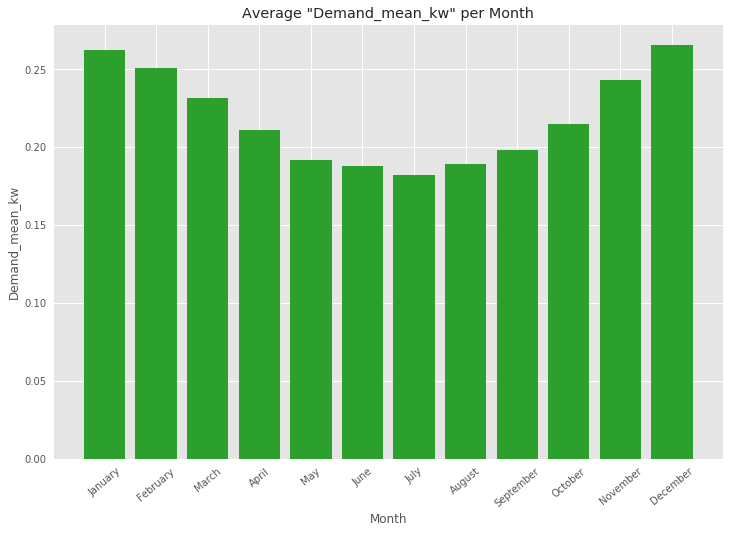

In [21]:
plot_bar_chart(residential_demand_2017_average_by_month, 'Demand_mean_kw', by='Month')

#### Hypothesis 3: Seasonly Average Of Residential Demand Data - 2017
We averaging data of residential demand based on `Season` attribute and displaying it below for 2017.

In [22]:
residential_demand_2017_averaged_by_season = residential_demand_2017.groupby(by='Season').mean()[['Demand_mean_kw','Demand_kw','N_households']]
residential_demand_2017_averaged_by_season

,Demand_mean_kw,Demand_kw,N_households
Season,,,
Autumn,0.219,2457.889,11383.009
Spring,0.212,1469.382,6973.827
Summer,0.187,1547.817,8292.873
Winter,0.260,2055.723,7863.267


**Findings:** Please make a note that average demand during `Winter (0.26 kw)` is highest compared to `Autumn`, `Spring` and `Summer` `(0.19-0.22 kw)`.

#### Plotting Bar Chart On Attributes Of Residential Demand(2017) Averaged Over Season
We are plotting 2 bar charts for monthly averaged attribute `Demand_mean_kw` of residential demand for 2017.

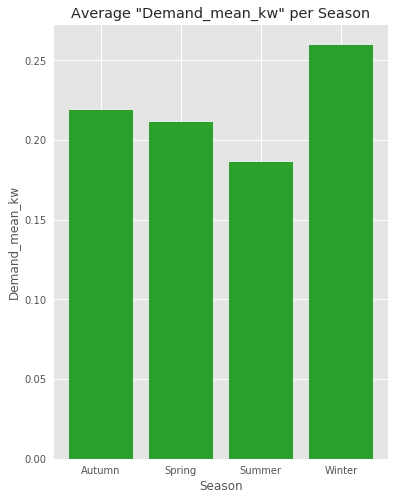

In [23]:
plot_bar_chart(residential_demand_2017_averaged_by_season, 'Demand_mean_kw',by='Season')

#### Hypothesis 4: Peak Hours Average Of Residential Demand Data - 2017
**Ananlysis:** We averaging data of residential demand based on `PeakvsOffPeakBasedOnTime` attribute and displaying it below for 2017.

In [24]:
residential_demand_2017_averaged_by_peakoffpeak1 = residential_demand_2017.groupby(by='PeakvsOffPeakBasedOnTime').mean()[['Demand_mean_kw','Demand_kw','N_households']]
residential_demand_2017_averaged_by_peakoffpeak1

,Demand_mean_kw,Demand_kw,N_households
PeakvsOffPeakBasedOnTime,,,
OffPeak,0.179,1535.529,8620.635
PeakHours,0.316,2717.185,8635.217


**Findings:** Please make a note that average demand during `off-peak` hours is around `0.18 kw`. Also average demand during peak hours is `0.32 kw`.

#### Plotting Bar Chart On Attributes Of Residential Demand(2017) Averaged Over PeakvsOffPeak
We are plotting 2 bar charts for monthly averaged attributes `Demand_mean_kw` of residential demand for 2017.

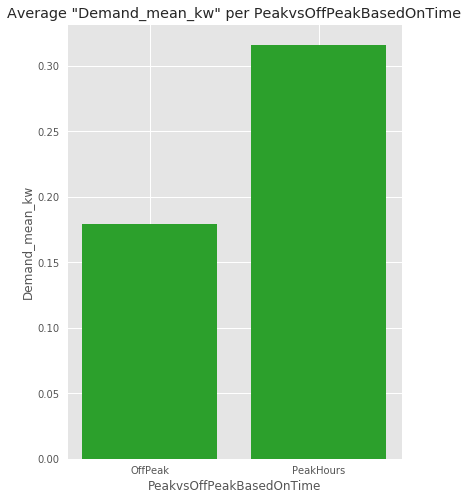

In [25]:
plot_bar_chart(residential_demand_2017_averaged_by_peakoffpeak1, 'Demand_mean_kw',by='PeakvsOffPeakBasedOnTime')

#### Hypothesis 5: Peak Hours(Based On Threshold) Average Of Residential Demand Data For 2017
**Analysis:** We averaging data of residential demand based on `PeakvsOffPeakBasedOnMeanDemandThreshold` attribute and displaying it below for 2017.

In [26]:
residential_demand_2017_averaged_by_peakoffpeak2 = residential_demand_2017.groupby(by='PeakvsOffPeakBasedOnMeanDemandThreshold').mean()[['Demand_mean_kw','Demand_kw','N_households']]
residential_demand_2017_averaged_by_peakoffpeak2

,Demand_mean_kw,Demand_kw,N_households
PeakvsOffPeakBasedOnMeanDemandThreshold,,,
OffPeak,0.145,1274.331,8750.360
Peak,0.290,2461.231,8504.552


**Findings:** Please make a note that average demand during `off-peak` hours is around `0.15 kw`. Also average demand during peak hours is `0.29 kw`.

#### Plotting Bar Chart On Attributes Of Residential Demand(2017) Averaged Over PeakvsOffPeak
We are plotting 2 bar charts for monthly averaged attribute `Demand_mean_kw` of residential demand for 2017.

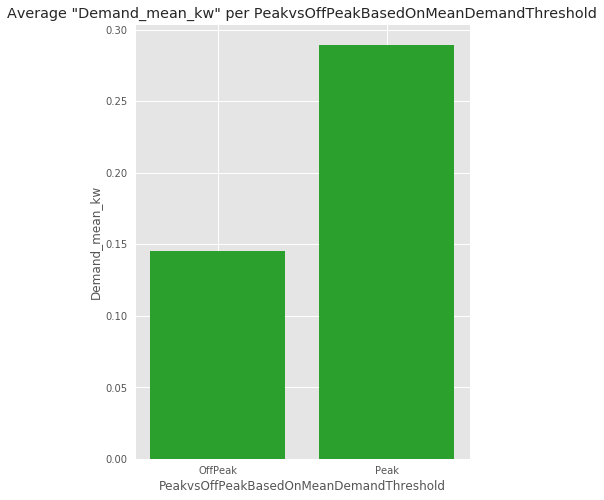

In [27]:
plot_bar_chart(residential_demand_2017_averaged_by_peakoffpeak2, 'Demand_mean_kw', by='PeakvsOffPeakBasedOnMeanDemandThreshold')

#### Hypotheis 6: Hour Of Day Based Average Of Residential Demand Data - 2017
**Analysis:** We averaging data of residential demand based on `HourOfDay` attribute and displaying it below for 2017.

In [28]:
residential_demand_2017_averaged_by_hour_of_day = residential_demand_2017.groupby(by='HourOfDay').mean()[['Demand_mean_kw','Demand_kw','N_households']]
residential_demand_2017_averaged_by_hour_of_day

,Demand_mean_kw,Demand_kw,N_households
HourOfDay,,,
0,0.130,1114.412,8603.956
1,0.112,958.008,8614.166
2,0.103,886.257,8614.777
3,0.100,859.784,8614.799
4,0.105,905.958,8614.871
5,0.132,1144.222,8614.890
6,0.185,1602.196,8614.942
7,0.219,1880.562,8615.416
8,0.225,1923.860,8617.011


**Findings:**  Please make a note that average Demand is low till `9 AM (~0.18 kw)`. Then it increases bit from `9 AM - 3PM (~0.22 kw)`. After 3 PM one can notice more increase in demand till `10 PM (~0.35 kw)` which are peak hours.

#### Plotting Bar Chart On Attributes Of Residential Demand(2017) Averaged Over Hour Of Day
We are plotting 2 bar charts for monthly averaged attribute `Demand_mean_kw` of residential demand for 2017.

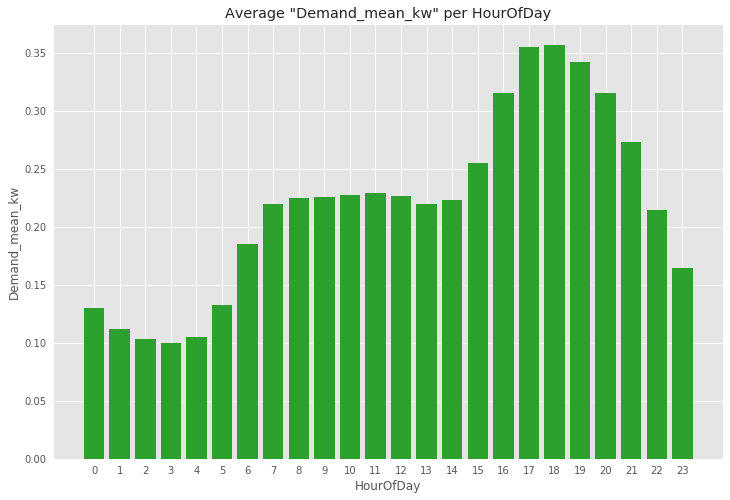

In [29]:
plot_bar_chart(residential_demand_2017_averaged_by_hour_of_day, 'Demand_mean_kw',by='HourOfDay')

#### Hypothesis 7: Displaying Quarter Based Average Of Residential Demand Data For 2017
**Analysis:** We averaging data of residential demand based on `Quarter` attribute and displaying it below for 2017.

In [30]:
residential_demand_2017_averaged_by_quarter = residential_demand_2017.groupby(by='Quarter').mean()[['Demand_mean_kw','Demand_kw','N_households']]
residential_demand_2017_averaged_by_quarter

,Demand_mean_kw,Demand_kw,N_households
Quarter,,,
1,0.248,1513.843,6120.105
2,0.197,1462.903,7445.456
3,0.190,1976.931,10355.453
4,0.241,2554.537,10511.268


**Findings:**  Please make a note that average Demand every day is between `0.21-0.24 kw`.It's high in quarted `1` and `4` whereas it's less in quarter `2` and `3`.

#### Plotting Bar Chart On Attributes Of Residential Demand(2017) Averaged Over Quarter
We are plotting 3 bar charts for monthly averaged attribute `Demand_mean_kw` of residential demand for 2017.

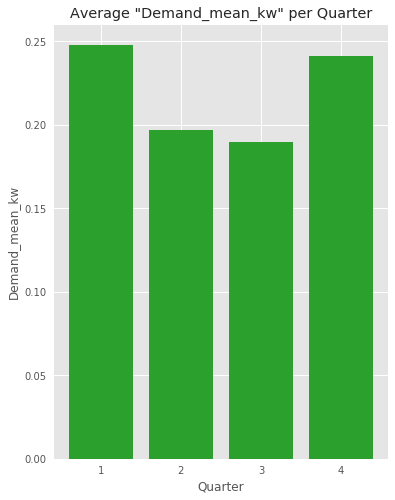

In [31]:
plot_bar_chart(residential_demand_2017_averaged_by_quarter, 'Demand_mean_kw', by='Quarter')

### Turbine Telemetry Analysis

#### Hypothesis 8: Average Of Curtailed Turbine Telemetry Data - 2017
**Analysis:** Below we are displaying average of `Power_kw`, `Setpoint_kw` and `Wind_ms` on curtailed turbine telemetry data which consists of data for year 2017.

In [32]:
curtailed_turbine_telemetry_2017_average = curtailed_turbine_telemetry_2017[['Power_kw','Setpoint_kw','Wind_ms', 'Power_Curtailed_kw']].mean()
curtailed_turbine_telemetry_2017_average

Power_kw              559.886
Setpoint_kw           529.177
Wind_ms                15.545
Power_Curtailed_kw     30.708
dtype: float64

**Findings:** Please make a note that average `Wind_ms` for whole data is around `9.5-10.0` whereas average on curtailed data is around `15.0`. Also make a note that average `Power_kw` difference between whole and curtailed data is around `30-35 kw`.

#### Hypothesis 9: Monthly Average Of Turbine Telemetry Data
**Analysis:** We averaging data of turbine telemetry based on `Month` attribute and displaying it below.

In [33]:
turbine_telemetry_average_by_month = turbine_telemetry.groupby(by='Month').mean()[['Power_kw','Setpoint_kw','Wind_ms']].loc[['January','February','March','April','May','June','July','August','September','October','November','December'],]
turbine_telemetry_average_by_month

,Power_kw,Setpoint_kw,Wind_ms
Month,,,
January,562.279,899.726,11.780
February,548.306,899.571,11.353
March,410.578,882.481,9.531
April,381.329,868.947,9.302
May,285.627,890.233,7.707
June,311.831,887.913,8.104
July,278.903,890.535,7.798
August,302.556,866.617,8.114
September,386.899,881.239,9.149


**Findings:** Please make a note that average power generation and wind speed is lowest during `May, June, July and August`. Power generation is comparatively during other months.Same pattern is followed by `Wind_ms` as well which suggest power generation is tightly linearly correlated with `Power_kw`

#### Plotting Bar Chart On Attributes Of Turbine Telemetry Averaged Over Month
We are plotting 3 bar charts for monthly averaged attributes `Power_kw`, and `Wind_ms` of turbine telemetry.

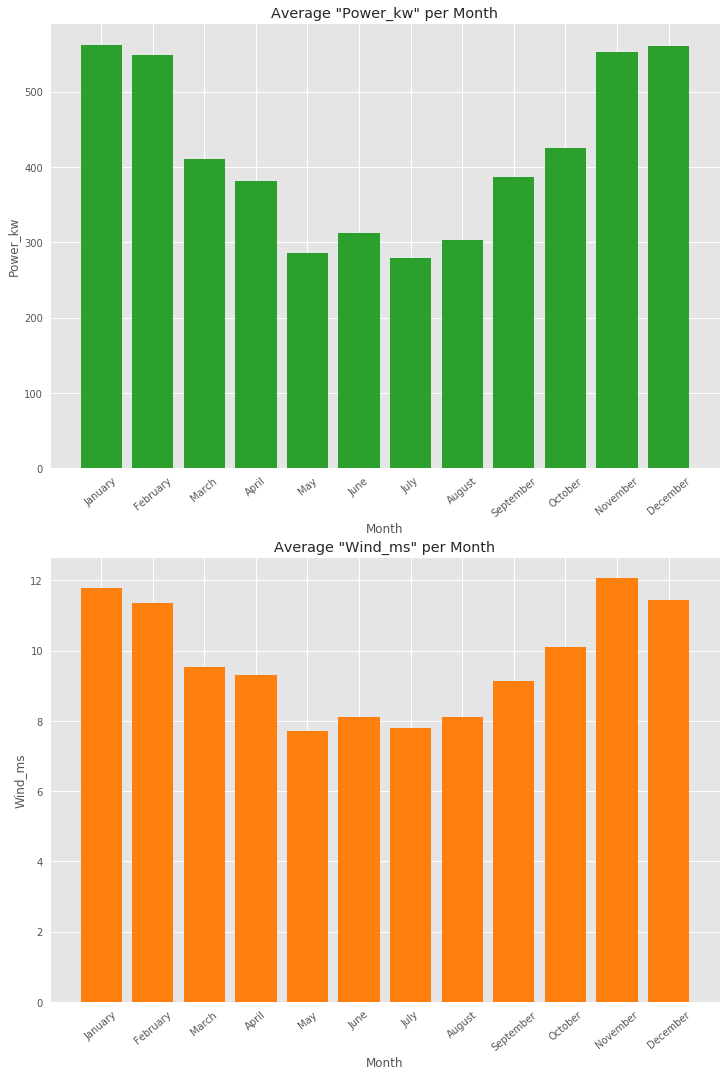

In [34]:
plot_bar_chart(turbine_telemetry_average_by_month, 'Power_kw','Wind_ms', by='Month')

#### Hypothesis 10: Plotting Bar Chart Based On Month Attributes Of Curtailed Turbine Telemetry Data (2016 & 2017)
**Analysis:** Below we are plotting Power(kw) which is getting curtailed monthly based of `Month` Attribute using Bar Chart on Curtailed Turbine Telemetry Data of year `2016 & 2017`.

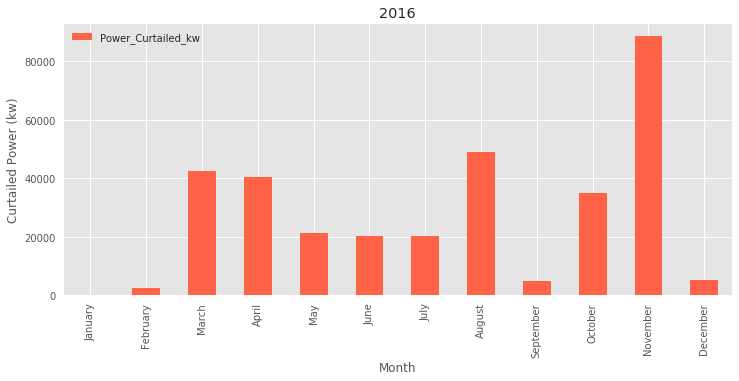

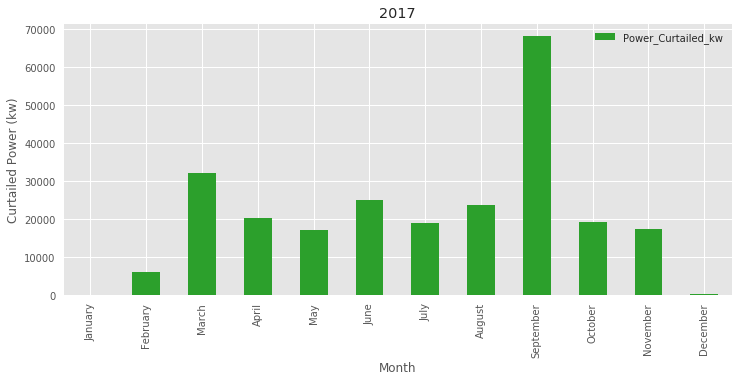

In [35]:
monthly_power_curtailed_2016 = curtailed_turbine_telemetry_2016.groupby(by='Month').sum()[['Power_Curtailed_kw']].loc[['January','February','March','April','May','June','July','August','September','October','November','December'],]
monthly_power_curtailed_2017 = curtailed_turbine_telemetry_2017.groupby(by='Month').sum()[['Power_Curtailed_kw']].loc[['January','February','March','April','May','June','July','August','September','October','November','December'],]
with plt.style.context(('seaborn', 'ggplot')):
    monthly_power_curtailed_2016.plot(kind='bar', figsize = (12,5), color='tomato')
    plt.ylabel('Curtailed Power (kw)')
    plt.title('2016');
    monthly_power_curtailed_2017.plot(kind='bar', figsize = (12,5), color='tab:green')
    plt.ylabel('Curtailed Power (kw)')
    plt.title('2017');

**Findings:** We can notice from above graphs that energy curtailment happens less during `December, January and February` which is `Winter`.It's quite more during other months.

#### Hypotheis 11: Plotting Bar Chart Based On Quarter Attributes Of Curtailed Turbine Telemetry Data (2016 & 2017)
**Analysis:** Below we are plotting Power(kw) which is getting curtailed quarterly based of `Quarter` Attribute using Bar Chart on Curtailed Turbine Telemetry Data of year `2017`.

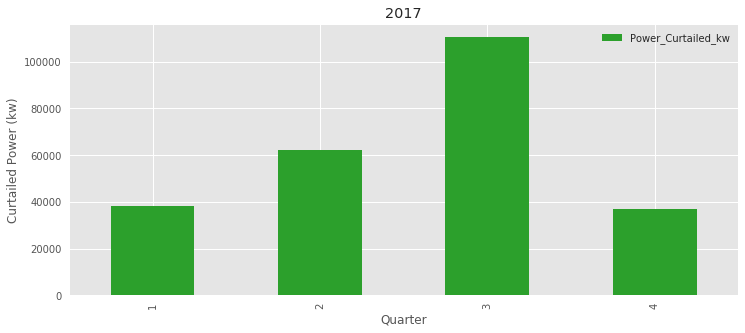

In [36]:
quarterly_power_curtailed_2017 = curtailed_turbine_telemetry_2017.groupby(by='Quarter').sum()[['Power_Curtailed_kw']]
with plt.style.context(('seaborn', 'ggplot')):
    quarterly_power_curtailed_2017.plot(kind='bar', figsize = (12,5), color='tab:green')
    plt.ylabel('Curtailed Power (kw)')
    plt.title('2017');

**Findings:** Energy curailment is less during `1st and 4th` quatrer of year than other quarters. 

### Comparison Of Residential Demand And Turbine Telemetry At Same Time.
#### Hypothesis 12: Combining 2017 Turbine Telemtry And Residential Demand Data Averaged Over Month.
**Analysis:** We are combining demand and turbine generated data averaged over month above and displaying it below so that we can compare demand with power generation.

In [37]:
turbine_telemetry_2017_average_by_month = turbine_telemetry_2017.groupby(by='Month').mean()[['Power_kw','Setpoint_kw','Wind_ms']].loc[['January','February','March','April','May','June','July','August','September','October','November','December'],]
combined_data_by_month = residential_demand_2017_average_by_month.join(turbine_telemetry_2017_average_by_month, on='Month')
combined_data_by_month

,Demand_mean_kw,Demand_kw,N_households,Power_kw,Setpoint_kw,Wind_ms
Month,,,,,,
January,0.262,1488.323,5673.940,583.449,899.920,11.745
February,0.251,1540.236,6137.202,566.724,899.357,11.847
March,0.231,1515.525,6550.829,482.694,881.849,10.681
April,0.211,1467.413,6945.369,528.159,880.930,10.956
May,0.192,1425.144,7424.366,308.161,890.887,7.928
June,0.188,1497.411,7967.335,345.652,886.299,8.676
July,0.182,1509.148,8277.821,249.273,887.813,7.497
August,0.190,1635.267,8622.962,284.129,882.299,7.729
September,0.198,2813.361,14292.579,386.485,876.237,9.148


**Findings:** Please make a note that pattern of Demand(`Demand_mean_kw`), Turbine Power generation(`Power_kw`) and wind speed(`Wind_ms`) has almost same pattern.

#### Plotting Combined Turbine Telmetry and Residential Demand Data Averaged Over Month.
Below we are plotting various attributes (Demand_mean_kw, Power_kw, Wind_ms etc.) averaged over months to do comparision between power average power generation per turbine with demand of customers.

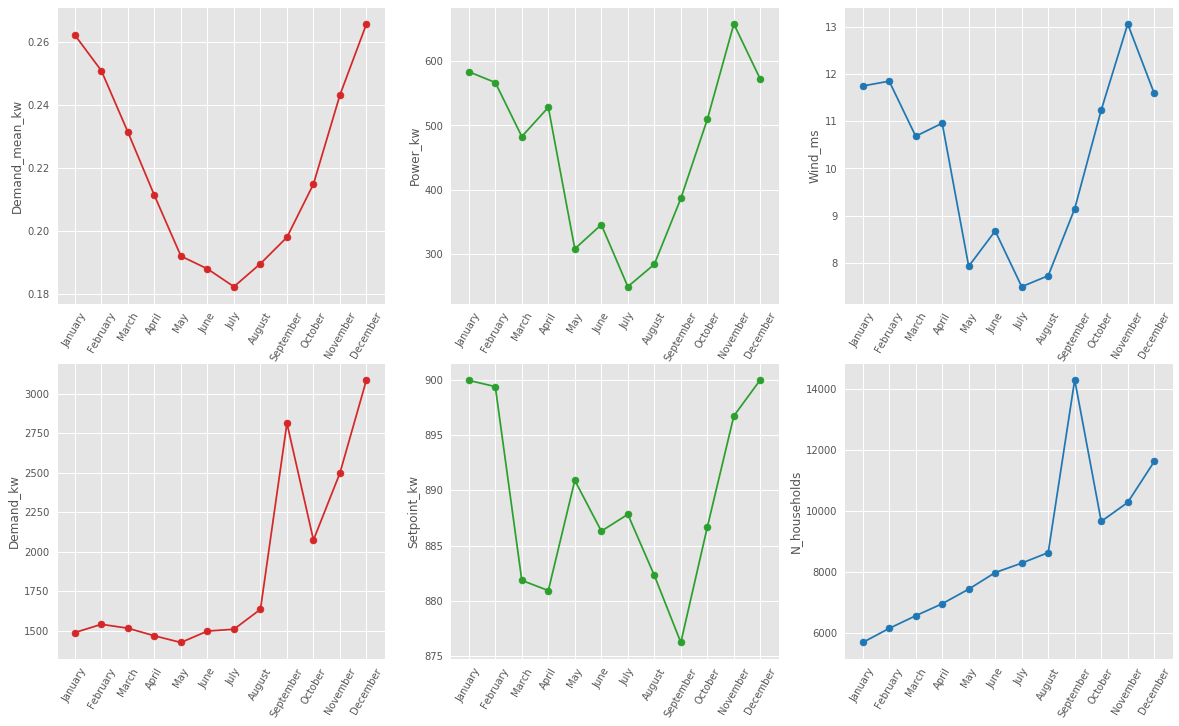

In [38]:
with plt.style.context(('seaborn','ggplot')):
    plt.figure(figsize=(20,12))
    plt.subplot(2,3,1)
    plt.plot(combined_data_by_month.index.values, combined_data_by_month.Demand_mean_kw, c='tab:red')
    plt.scatter(combined_data_by_month.index, combined_data_by_month.Demand_mean_kw, c='tab:red')
    plt.ylabel('Demand_mean_kw')
    plt.xticks(rotation=60);

    plt.subplot(2,3,2)
    plt.plot(combined_data_by_month.index.values, combined_data_by_month.Power_kw, c='tab:green')
    plt.scatter(combined_data_by_month.index, combined_data_by_month.Power_kw, c='tab:green')
    plt.ylabel('Power_kw')
    plt.xticks(rotation=60);

    plt.subplot(2,3,3)
    plt.plot(combined_data_by_month.index.values, combined_data_by_month.Wind_ms, c='tab:blue')
    plt.scatter(combined_data_by_month.index, combined_data_by_month.Wind_ms, c='tab:blue')
    plt.ylabel('Wind_ms')
    plt.xticks(rotation=60);

    plt.subplot(2,3,4)
    plt.plot(combined_data_by_month.index.values, combined_data_by_month.Demand_kw, c='tab:red')
    plt.scatter(combined_data_by_month.index, combined_data_by_month.Demand_kw, c='tab:red')
    plt.ylabel('Demand_kw')
    plt.xticks(rotation=60);

    plt.subplot(2,3,5)
    plt.plot(combined_data_by_month.index.values, combined_data_by_month.Setpoint_kw, c='tab:green')
    plt.scatter(combined_data_by_month.index, combined_data_by_month.Setpoint_kw, c='tab:green')
    plt.ylabel('Setpoint_kw')
    plt.xticks(rotation=60);

    plt.subplot(2,3,6)
    plt.plot(combined_data_by_month.index.values, combined_data_by_month.N_households, c='tab:blue')
    plt.scatter(combined_data_by_month.index, combined_data_by_month.N_households, c='tab:blue')
    plt.ylabel('N_households')
    plt.xticks(rotation=60);

#### Hypothesis 13: Plotting 'Demand_kw', 'Power_kw', 'Wind_ms' and 'Setpoint_kw' For 2 Days For Each Month Of Year 2017.
**Analysis** Below we are plotting trend of `Demand_kw`, `Power_kw` , `Wind_ms` and `Setpoint_kw` attributes for 2 days`(1st and 15th Day Of Each Month)` of month next to each other for comparison purpose for year `2017`. We can do comparison based on plots next to each other to analyse demand and compare it with production by turbine. We can also do comparison of production of energy based on wind speed. We can also analyse setpoint at particular time to see whether any particular event caused curtailment. 

We are also drawing black lines in `Demand_kw`, `Power_kw` and `Wind_ms` which is average for that particular day for that attributes.

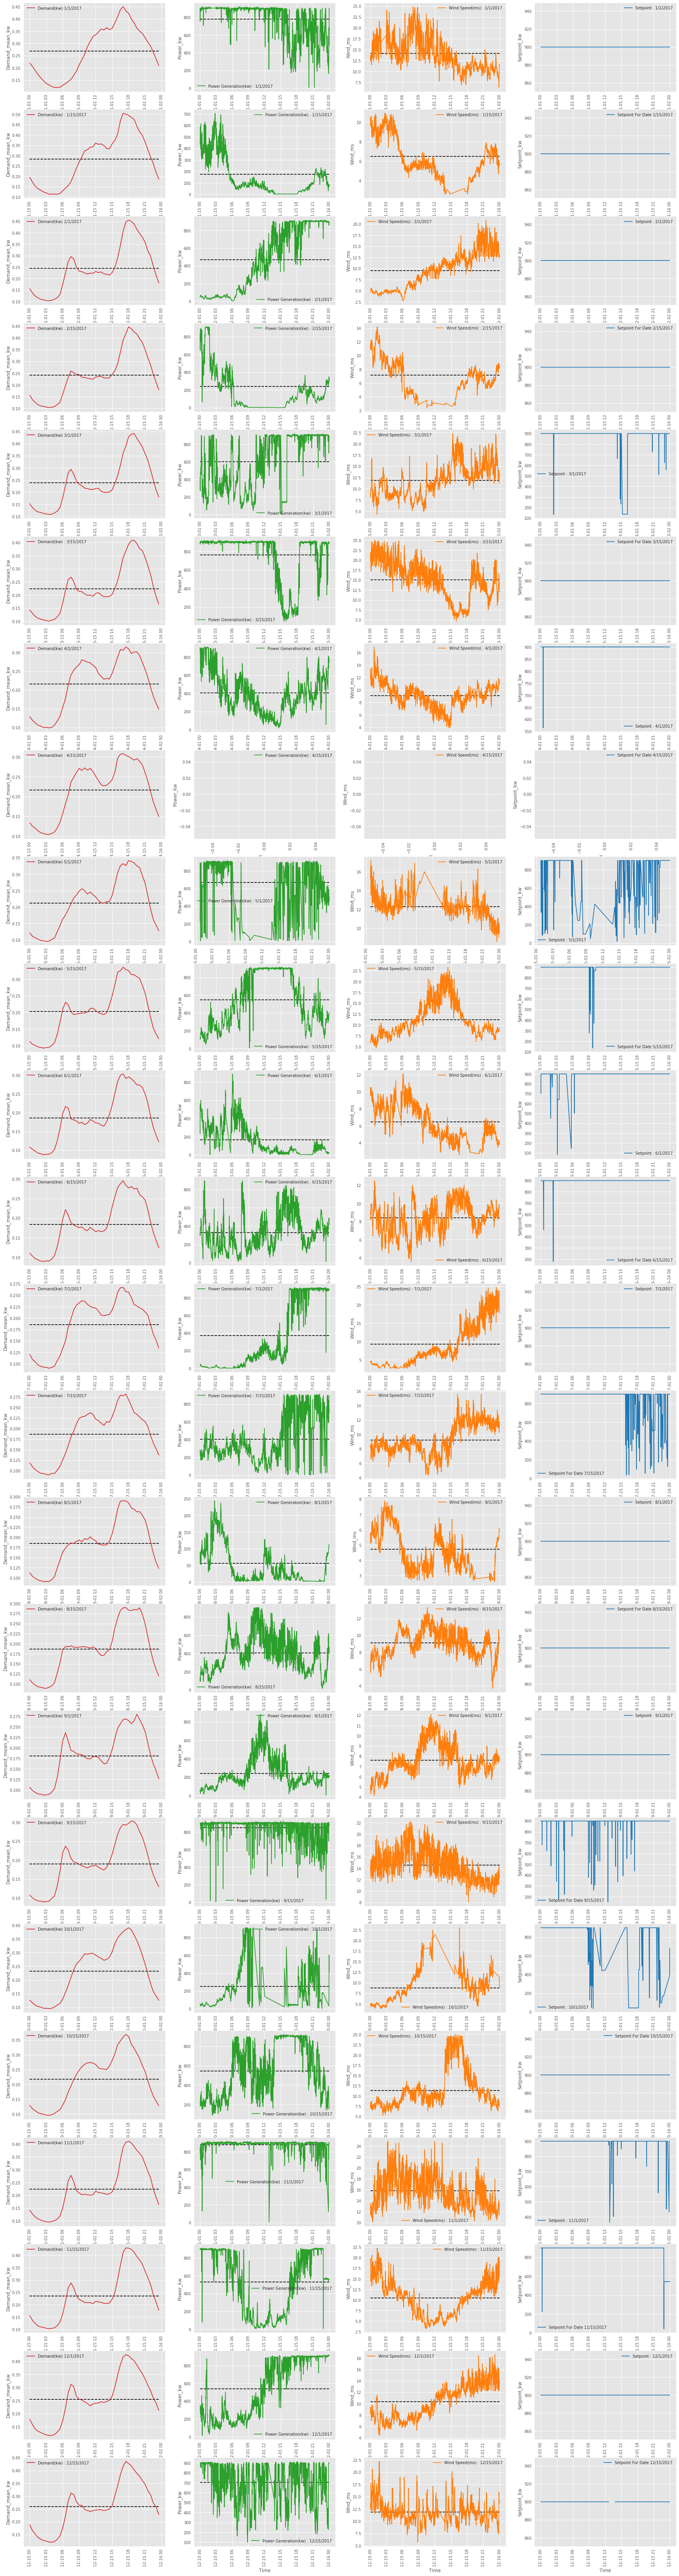

In [39]:
with plt.style.context(('seaborn','ggplot')):
    fig  = plt.figure(figsize=(30, 120))
    for i in range(1,13):
        dt1 = '%d/1/2017'%i
        dt3 = '%d/15/2017'%i
        
        turbine_data_day1 = turbine_telemetry_2017[(turbine_telemetry_2017.index.month == i) & (turbine_telemetry_2017.index.day == 1)]
        turbine_data_day15 = turbine_telemetry_2017[(turbine_telemetry_2017.index.month == i) & (turbine_telemetry_2017.index.day == 15)]
        
        res_data_day1 = residential_demand_2017[(residential_demand_2017.index.month == i) & (residential_demand_2017.index.day == 1)]
        res_data_day15 = residential_demand_2017[(residential_demand_2017.index.month == i) & (residential_demand_2017.index.day == 15)]
        
        plt.subplot(24, 4, 8*i-7)
        plt.plot(res_data_day1.index, res_data_day1['Demand_mean_kw'], color='tab:red', label='Demand(kw) %s'%dt1)
        if len(res_data_day1)> 0:
            plt.hlines(res_data_day1['Demand_mean_kw'].mean(), res_data_day1.index[0], res_data_day1.index[-1], linestyle='dashed')
        plt.xticks(rotation='vertical')
        plt.ylabel('Demand_mean_kw')
        plt.xlabel('Time')
        plt.legend(loc='best');
        
        plt.subplot(24, 4, 8*i-6)
        plt.plot(turbine_data_day1.index, turbine_data_day1['Power_kw'], color='tab:green', label='Power Generation(kw) : %s'%dt1)
        if len(turbine_data_day1)>0:
            plt.hlines(turbine_data_day1['Power_kw'].mean(), turbine_data_day1.index[0], turbine_data_day1.index[-1], linestyle='dashed')
        plt.xticks(rotation='vertical')
        plt.ylabel('Power_kw')
        plt.xlabel('Time')
        plt.legend(loc='best');
        
        plt.subplot(24, 4, 8*i-5)
        plt.plot(turbine_data_day1.index, turbine_data_day1['Wind_ms'], color='tab:orange', label='Wind Speed(ms) : %s'%dt1)
        if len(turbine_data_day1)>0:
            plt.hlines(turbine_data_day1['Wind_ms'].mean(), turbine_data_day1.index[0], turbine_data_day1.index[-1], linestyle='dashed')
        plt.xticks(rotation='vertical')
        plt.ylabel('Wind_ms')
        plt.xlabel('Time')
        plt.legend(loc='best');
        
        plt.subplot(24, 4, 8*i-4)
        plt.plot(turbine_data_day1.index, turbine_data_day1['Setpoint_kw'], color='tab:blue', label='Setpoint : %s'%dt1)
        plt.xticks(rotation='vertical')
        plt.ylabel('Setpoint_kw')
        plt.xlabel('Time')
        plt.legend(loc='best');
        
        plt.subplot(24, 4 , 8*i-3)
        plt.plot(res_data_day15.index, res_data_day15['Demand_mean_kw'], color='tab:red', label='Demand(kw) : %s'%dt3)
        if len(res_data_day15)>0:
            plt.hlines(res_data_day15['Demand_mean_kw'].mean(), res_data_day15.index[0], res_data_day15.index[-1], linestyle='dashed')
        plt.xticks(rotation='vertical')
        plt.ylabel('Demand_mean_kw')
        plt.legend(loc='best');
        
        plt.subplot(24, 4, 8*i-2)
        plt.plot(turbine_data_day15.index, turbine_data_day15['Power_kw'], color='tab:green', label='Power Generation(kw) : %s'%dt3)
        if len(turbine_data_day15)>0:
            plt.hlines(turbine_data_day15['Power_kw'].mean(), turbine_data_day15.index[0], turbine_data_day15.index[-1], linestyle='dashed')
        plt.xticks(rotation='vertical')
        plt.ylabel('Power_kw')
        plt.xlabel('Time')
        plt.legend(loc='best');
        
        plt.subplot(24, 4, 8*i-1)
        plt.plot(turbine_data_day15.index, turbine_data_day15['Wind_ms'], color='tab:orange', label='Wind Speed(ms) : %s'%dt3)
        if len(turbine_data_day15)>0:
            plt.hlines(turbine_data_day15['Wind_ms'].mean(), turbine_data_day15.index[0], turbine_data_day15.index[-1], linestyle='dashed')
        plt.xticks(rotation='vertical')
        plt.ylabel('Wind_ms')
        plt.xlabel('Time')
        plt.legend(loc='best');
        
        plt.subplot(24, 4, 8*i)
        plt.plot(turbine_data_day15.index, turbine_data_day15['Setpoint_kw'], color='tab:blue', label='Setpoint For Date %s'%dt3)
        plt.xticks(rotation='vertical')
        plt.ylabel('Setpoint_kw')
        plt.xlabel('Time')
        plt.legend(loc='best');

**Fingings** Above graphs depicts that peak hours during which demand is most are generally between `3 PM to 10 PM`. Also make a note that there is positive linear correaltion between wind speed and power generation.

### List Of Findings From Above EDA
Below are list of findings by doing exploratory data analysis fo turbine telemetry and residential demand data. We'll be listing them which will help us design better DR strategy.

* Average wind speed per year(2016 and 2017) is around `9.5-10` overall. Wind speed of around `10` is able to generate Power around `312 kw(2016) - 412 kw(2017)` wheareas wind speed of around 15 is able to generate Power around `355 kw(2016) - 440 kw(2017)`. 
* We can also notice that curtailement is currently happening only around `3.62%(2016) & 2.39%(2017)`. We can notice that average Setpoint overall is `773(2016) - 884(2017)` whereas during curtailment its set at around `411(2016)-486(2017)` which is around half of default setpoint at 900 kw in most cases.
* Average residential demand is around `0.21` kw for year `2017`. Average number of households is around `8624` with their average requirement of around `1880 kw`.
* There is trend in average Power generation as well as Wind speed based on month which is high During January and then starts dropping till April, then it stays low for another 4 months from May-August and start increasing again till December. `Power_kw(Jan-April) ~ 350-650 kw`.`Power_kw(May-August) ~ 250-300 kw`. `Power_kw(September-December) ~ 350-650 kw`. `Wind_ms(Jan-April) ~ 8-12`.`Wind_ms(May-August) ~ 6-8`. `Wind_ms(September-December) ~ 8-12`. Wind speed is high during November, December, January & February. 
* Average power demand is generally between `0.21-0.26 kw`. Number of households is increasing constantly with fast rising from August which is raising power requirements for users as well. `Users ~ 6,000-12,000`. `Power_kw ~ 1500-3000 kw`.
* Average demand during `Winter (0.26 kw)` is highest compared to `Autumn`, `Spring` and `Summer` `(0.19-0.22 kw)`.
* Average demand overall is `0.21-0.24 kw` and its not affected by weekday or weekend. 
* Average demand during `off-peak` hours is around `0.15-0.18 kw`. Also average demand during `peak` hours is `0.29-0.31 kw`. 
* Average power demand is below `1250` kw from midnight `12:00 AM` till morning `9:00 AM`. It then raises constantly from `9:00 AM` reaching its peak of around `2500 kw` at `6 PM` and declines again at same rate till midnight `12:00 AM`. We need to handle this peak requirement between `9:00 AM till 9:00-10:00 PM`. 
* Power curtailment is less during month of `December, January and February`. Power curtailment is also less during months `May, June and July` as well compared to months other than Dec, Jan and Feb. 
* Energy Curtailedment for year 2016 and 2017 is `329680.00 kW` and `248123.00 kW` which is around `30 kW` daily.

## What is Demand Response ?
Demand Response is a strategy by electric utility company to better match demand of power with actual production. It triies to find proper balance between demand and power generation. It helps prevention of peak demand on utility which can halt its production and create blackout. It also helps reducing load on electric grid for proper functioning of it.

Main objective behind DR is involvement of individual households to use utilities at different time to avoid peak load on grid. It also involves charging utility on electric utiity company to charge it at particular time when there is low demand and better map demand with power generation from renewable sources like wind mills.

Source: https://en.wikipedia.org/wiki/Demand_response

## Discussion
We have done above Exploratory Data Analysis of Orkney Residential Power Demand and Turbine Power Production and listed out our findings above along with graphs for findings. We'll try to suggest solution to proper DR strategy to handle peak load better using above findings.

We'll be considering curreent scenario at Orkney which does not have any DR strategy implemented and compare it with our suggested DR strategy to show improvements/value additions.

Please find below combined data with Average Demand and Power genration per month along with Peak demand and Power generation during that months as well. We also has included total energy curtailed per month and average energy curtailed per month as well. We'll be planning our strategy based on this table. We have also included difference between peak demand and average demand. We have also included what percent increase in demand is between average and peak demand.

In [40]:
peak_demands_per_month = residential_demand_2017.groupby(by='Month').max()[['Demand_mean_kw',]]
peak_demands_per_month.columns = ['Peak_Demand_mean_kw', ]

peak_generation = turbine_telemetry_2017.groupby(by='Month').max()[['Power_kw', 'Wind_ms']]
peak_generation.columns = ['Peak_Power_kw', 'Peak_Wind_ms']

avg_curtailed_data_per_month = curtailed_turbine_telemetry_2016.groupby(by='Month').mean()[['Power_Curtailed_kw',]]
avg_curtailed_data_per_month.columns = ['Mean_Power_Curtailed_kw']

total_curtailed_data_per_month = curtailed_turbine_telemetry_2016.groupby(by='Month').sum()[['Power_Curtailed_kw',]]
total_curtailed_data_per_month.columns = ['Total_Power_Curtailed_kw']

t1 = combined_data_by_month[['Demand_mean_kw','Power_kw','Wind_ms']].join(peak_demands_per_month)
t2 = t1.join(peak_generation)
t3 = t2.join(avg_curtailed_data_per_month)

final_combined_data = t3.join(total_curtailed_data_per_month)
final_combined_data.columns = ['Avg_Demand','Avg_Power','Avg_Wind','Avg_Peak_Demand','Max_Power','Max_Wind', 'Avg_Curtailed_Power','Total_Curtailed_Power']
final_combined_data['DemandDiff'] = final_combined_data['Avg_Peak_Demand'] - final_combined_data['Avg_Demand']
final_combined_data['DemandDiffPercent'] = final_combined_data['DemandDiff'] * 100 /  final_combined_data['Avg_Demand']
final_combined_data

,Avg_Demand,Avg_Power,Avg_Wind,Avg_Peak_Demand,Max_Power,Max_Wind,Avg_Curtailed_Power,Total_Curtailed_Power,DemandDiff,DemandDiffPercent
Month,,,,,,,,,,
January,0.262,583.449,11.745,0.510,930.0,25.0,35.000,35.0,0.247,94.346
February,0.251,566.724,11.847,0.500,929.0,25.0,100.708,2417.0,0.249,99.199
March,0.231,482.694,10.681,0.457,938.0,25.0,33.834,42462.0,0.226,97.465
April,0.211,528.159,10.956,0.366,923.0,25.0,32.160,40361.0,0.155,73.490
May,0.192,308.161,7.928,0.342,919.0,23.3,39.660,21139.0,0.150,78.129
June,0.188,345.652,8.676,0.342,930.0,25.0,52.855,20349.0,0.154,82.097
July,0.182,249.273,7.497,0.308,927.0,25.0,73.645,20326.0,0.126,69.249
August,0.190,284.129,7.729,0.323,921.0,19.3,25.041,48931.0,0.133,70.334
September,0.198,386.485,9.148,0.365,925.0,25.0,23.602,4744.0,0.167,84.410


Please make a note that mean demand during peak hours is almost `75-100%` increament than average demand.

#### Explaining Columns:
* **Avg_Demand_mean** - Average demand per house for particular month.
* **Avg_Power** - Average Power generated by this turbine for that particular month.
* **Avg_Wind** - Average wind speed during that particular month.
* **Avg_Peak_Demand** -  Average peak demand per house for particular month.
* **Max_Power** - Average Maximum Power generated by turbine for particular month.
* **Max_Wind** - Average Maximum Wind speed for particular month.
* **Total_Curtailed_Power** - Total curtailed power per month.
* **Avg_Curtailed_Power** - Avg curtailed power per month on daily basis.
* **DemandDiff** - Difference between Average peak demand per house and Average demand per house.
* **DemandDiffPercent** - Percent extra energy demand during peak hours than average demand.

### Cost Of Meter
Electricity company need to set smart meters to house enrolling for DR. Smart meters generally cost around  `£100` per households. Smart meters can be used to analyse demand of particular house and move load to balance demand during peak hours by moving load of different utilities to different times by analysing if customer consent is given. Smart meter can also be used to give `suggestions` to customers during bill time on moving usage of particular utilities from particular time to avoid peak load on grid.

Smart meters can also charge differntly during different hours hence it can charge more for using particular utility during peak hours and less during off-peak hours to force customer move their utility usage during off-peak hours.

Smart meter price source: https://www.ukpower.co.uk/home_energy/smart_meters

### Lets Try To Find Out How Many Customers Single Turbine Can Handle Considering Average Demand Per Month?

We'll try to multiply mean demand with various number of customers and will try to keep it below average power generation by that turbine to find out how many customers a turbine can handle efficiently on average without considering peak demands.

In [41]:
final_combined_data_scenario1 = copy.deepcopy(final_combined_data)
final_combined_data_scenario1['1600Cust_Demand'] = 1600 * final_combined_data_scenario1['Avg_Demand']
final_combined_data_scenario1['1600Cust_Total_Curtailed_Power(100% DR)'] = final_combined_data_scenario1['Total_Curtailed_Power'] / 1600
final_combined_data_scenario1['1600Cust_Avg_Curtailed_Power(100% DR)'] = final_combined_data_scenario1['Avg_Curtailed_Power'] / 1600

final_combined_data_scenario1['1600Cust_Total_Curtailed_Power(50% DR)'] = final_combined_data_scenario1['Total_Curtailed_Power'] / 800
final_combined_data_scenario1['1600Cust_Avg_Curtailed_Power(50% DR)'] = final_combined_data_scenario1['Avg_Curtailed_Power'] / 800

final_combined_data_scenario1['1600Cust_Total_Curtailed_Power(20% DR)'] = final_combined_data_scenario1['Total_Curtailed_Power'] / 320
final_combined_data_scenario1['1600Cust_Avg_Curtailed_Power(20% DR)'] = final_combined_data_scenario1['Avg_Curtailed_Power'] / 320

final_combined_data_scenario1['1600Cust_Total_Curtailed_Power(10% DR)'] = final_combined_data_scenario1['Total_Curtailed_Power'] / 160
final_combined_data_scenario1['1600Cust_Avg_Curtailed_Power(10% DR)'] = final_combined_data_scenario1['Avg_Curtailed_Power'] / 160

final_combined_data_scenario1

,Avg_Demand,Avg_Power,Avg_Wind,Avg_Peak_Demand,Max_Power,Max_Wind,Avg_Curtailed_Power,Total_Curtailed_Power,DemandDiff,DemandDiffPercent,1600Cust_Demand,1600Cust_Total_Curtailed_Power(100% DR),1600Cust_Avg_Curtailed_Power(100% DR),1600Cust_Total_Curtailed_Power(50% DR),1600Cust_Avg_Curtailed_Power(50% DR),1600Cust_Total_Curtailed_Power(20% DR),1600Cust_Avg_Curtailed_Power(20% DR),1600Cust_Total_Curtailed_Power(10% DR),1600Cust_Avg_Curtailed_Power(10% DR)
Month,,,,,,,,,,,,,,,,,,,
January,0.262,583.449,11.745,0.510,930.0,25.0,35.000,35.0,0.247,94.346,419.592,0.022,0.022,0.044,0.044,0.109,0.109,0.219,0.219
February,0.251,566.724,11.847,0.500,929.0,25.0,100.708,2417.0,0.249,99.199,401.446,1.511,0.063,3.021,0.126,7.553,0.315,15.106,0.629
March,0.231,482.694,10.681,0.457,938.0,25.0,33.834,42462.0,0.226,97.465,370.232,26.539,0.021,53.078,0.042,132.694,0.106,265.387,0.211
April,0.211,528.159,10.956,0.366,923.0,25.0,32.160,40361.0,0.155,73.490,337.999,25.226,0.020,50.451,0.040,126.128,0.101,252.256,0.201
May,0.192,308.161,7.928,0.342,919.0,23.3,39.660,21139.0,0.150,78.129,307.146,13.212,0.025,26.424,0.050,66.059,0.124,132.119,0.248
June,0.188,345.652,8.676,0.342,930.0,25.0,52.855,20349.0,0.154,82.097,300.675,12.718,0.033,25.436,0.066,63.591,0.165,127.181,0.330
July,0.182,249.273,7.497,0.308,927.0,25.0,73.645,20326.0,0.126,69.249,291.595,12.704,0.046,25.407,0.092,63.519,0.230,127.037,0.460
August,0.190,284.129,7.729,0.323,921.0,19.3,25.041,48931.0,0.133,70.334,303.310,30.582,0.016,61.164,0.031,152.909,0.078,305.819,0.157
September,0.198,386.485,9.148,0.365,925.0,25.0,23.602,4744.0,0.167,84.410,316.752,2.965,0.015,5.930,0.030,14.825,0.074,29.650,0.148


We are below plotting demand graphs of customers considering various attributes. We plot plotting attributes like average demand per house for each month, average demand during peak hour per house, 100% DR (including all houses to use curtailed energy with how much energy on average each house will get from curtailed energy), 50% DR, 20% DR and 10% DR.

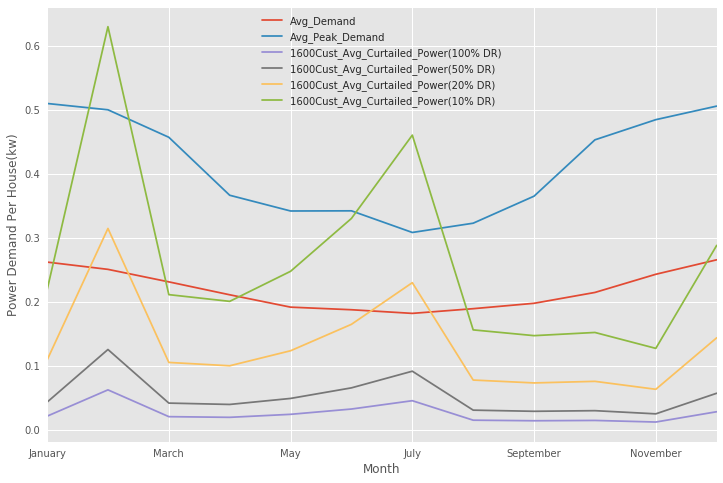

In [42]:
with plt.style.context(('seaborn', 'ggplot')):
    final_combined_data_scenario1.plot(y=['Avg_Demand', 
                                          'Avg_Peak_Demand',
                                          '1600Cust_Avg_Curtailed_Power(100% DR)', 
                                          '1600Cust_Avg_Curtailed_Power(50% DR)', 
                                          '1600Cust_Avg_Curtailed_Power(20% DR)', 
                                          '1600Cust_Avg_Curtailed_Power(10% DR)'], figsize=(12,8))
    plt.ylabel('Power Demand Per House(kw)');

#### Explaining Columns:
* **1600Cust_Demand** - Demand of 1600 customers in kw for particular month.
* **1600Cust_Total_Curtailed_Power** - Total Curtailed Power available per 1600 house for particular month.
* **1600Cust_Avg_Curtailed_Power** - Total Curtailed Power available per 1600 house for particular month on daily basis.

We can notice from above comparing `1600Cust_Demand` (Power Demand in kw of 1600 customers) column with `Avg_Power`(Average Power Generated in kw By Single Turbine), that `1 turbine` is able to handle around `1600` customers easily on average and may be few more hundreds around `1800` considering that average is average of `peak` and `off-peak` so will be little leaning towards peak demands. More often peak demand will be during particular hours of days only and not throughout day.

We have also calculated average curtailed power in kw that will be available during particular month to this 1600 customers from this turbine. We have also included total power that will be available to 1600 customers during particular month.

Also Please make a note that we have also taken into consideration increase and decrease in power demand based on months which is high during winter and automn months but there is also more power generated by turbines during this months due to high wind speeds.

**Note:** Please make a note that we have not taken into consideration of peak hour demands into this. We have tried to find out how many households a turbine can handle without peak demand on normal.

### Lets consider DR Penetration.
DR Penetration will invovle use of curtailed energy by particular turbine. We need to map that curtailed energy to households of Orkeny Islands and use them few utilities during that time rather that putting all load during peak hours. We can do so using smart meters which will charge particular utilities when energy is getting curtailed.

Currently around `329680.00 kW (3.29 MW)` of energy is getting curtailed for year `2016` and `248123.00 kW (2.48 MW)` for year `2017`. We'll need to map this energy to various households based on DR penetration (No of households involved in DR Penetration). 

#### % House Hold Penetration & Cost Of DR Scheme 

Below we are trying various DR schemes and suggesting cost, % DR penetration, people needed for DR etc.
We'll try to answer questions like below:
* How much can this be reduced by different levels of DR penetration?
* How many local households would need to be on our DR scheme in order to supply this level of DR?

##### Explaining Attributes Covered Below:


Attribute | Value
-|-
**Population** | Population of Orkney Island
**DR Penetration** | % of DR Penentration
**People Involved in DR Exercise** | Number of People involved in DR Exercise
**Cost Of DR** | Overall Cost of DR Exercise
**Turbine Capicity(No Of Households)** | Capacity of Single Turbine (Number of Households it can handle).
**Number Of Turbines Required** | Number of Turbines Required for Population of Orkeny Island
**Average House Demand(kW)** | Average demand per house on Orkney Island
**Peak Hours Demand(kW)** | Demand During Peak hours per house
**Curtailed Energy Available per Households involved in DR(kW)** | Curtailed Energy Available per customer into consideration of DR exercise.
**Demand Handled through DR for involved Households(kW)** | Demand of individual household handled through Curtailed Energy.
**% of Demand Handled Through DR** | Percent of total demand handled through DR. This is demand handled through DR divided by average demand and percentage of it.


**Case 1: No DR Penetration- Default**

Attribute | Value
-|-
**Population** | 22,000
**DR Penetration** | 0%
**People Involved in DR Exercise** | 22000 * 0 = 0
**Cost Of DR** | 0 * £100 = 0
**Turbine Capicity(No Of Households)** | 1600
**Number Of Turbines Required** | 22000/1600 = ~14.
**Average House Demand(kW)** | ~0.18-0.27 KW 
**Peak Hours Demand(kW)** | ~0.32-0.51 KW
**Curtailed Energy Available per Households involved in DR(kW)** | ~0.015 - 0.065 kW (Wasted)
**Demand Handled through DR for involved Households(kW)** | ~0.00 (Wasted)
**% of Demand Handled Through DR** | ~0%


**Case 2: 100% DR Penetration**

Attribute| Values
-|-
**Population** | 22,000
**DR Penetration** | 33%
**People Involved in DR Exercise** | 22000 * 1.00 = 22,000
**Cost Of DR** | 22,000 * £100 = £2,200,000
**Turbine Capicity(No Of Households)** | 1600 = ~1600-1800
**Number Of Turbines Required** | 22000/1600 = 13.75, 22000/1800 = 12.22 ~ 13-14.
**Average House Demand(kw)** | ~0.18-0.27 kW
**Peak Hours Demand(kw)** | ~0.32-0.51 kW
**Curtailed Energy Available per Households involved in DR(kW)** | ~0.015 - 0.065 kW
**Demand Handled through DR for involved Households(kW)** | ~0.015 - 0.065 kW
**% of Demand Handled Through DR** | ~8-35%


**Case 3: 50% DR Penetration**


Attribute| Values
-|-
**Population** | 22,000
**DR Penetration** | 20%
**People Involved in DR Exercise** | 22000 * 0.50 = 11000
**Cost Of DR** | 11,000 * £100 = £1,100,000
**Turbine Capicity(No Of Households)** | 1600 = 1250
**Number Of Turbines Required** |  22000/1600 = 13.75, 22000/1800 = 12.22 ~ 13-14.
**Average House Demand(kW)** | ~0.18-0.27 kW
**Peak Hours Demand(kW)** | ~0.32-0.51 kW
**Curtailed Energy Available per Households involved in DR(kW)** | ~0.015 - 0.065 kW
**Demand Handled through DR for involved Households(kW)** | ~0.026 - 0.126 kW
**% of Demand Handled Through DR** | ~10-70%


**Case 4: 20% DR Penetration**


Attribute| Value
-|-
**Population** | 22,000
**DR Penetration** | 20%
**People Involved in DR Exercise** | 22000 * 0.20 = 4400
**Cost Of DR** | 4400 * £100 = £440,000
**Turbine Capicity(No Of Households)** | 1600 = ~1600
**Number Of Turbines Required** | 22000/1600 = 13.75, 22000/1800 = 12.22 ~ 13-14.
**Average House Demand(kw)** | ~0.18-0.27 kW 
**Peak Hours Demand(kw)** | ~0.32-0.51 kW
**Curtailed Energy Available per Households involved in DR(kW)** | ~0.074 - 0.315 kW
**Demand Handled through DR for involved Households(kW)** | 0.074 - 0.315 kW
**% of Demand Handled Through DR** | ~40%-100%


**Case 4: 10% DR Penetration**


Attribute | Value
-|-
**Population** | 22,000
**DR Penetration** | 10%
**People Involved in DR Exercise** | 22000 * 0.10 = 2200
**Cost Of DR** | 2200 * £100 = £220,000
**Turbine Capicity(No Of Households)** | 1600 = ~1600
**Number Of Turbines Required** | 22000/1600 = 13.75, 22000/1800 = 12.22 ~ 13-14.
**Average House Demand(kW)** | ~0.18-0.27 kW
**Peak Hours Demand(kW)** | ~0.32-0.51 kW
**Curtailed Energy Available per Households involved in DR(kW)** | ~0.074 - 0.315 kW
**Demand Handled through DR for involved Households(kW)** | 0.128 - 0.629 kW
**% of Demand Handled Through DR** | ~>80%-100%

### Different DR strategies:
* **Emergency Demand Response**  is used to mitigate the potential for blackouts or brownouts during times when demand threatens to exceed supply resources. This typically occurs on days of extreme hot or cold temperatures when heating and cooling systems are causing greater demand on the grid.

* **Economy Demand Response** is employed by utilities to avoid the significantly higher costs of producing energy during peak demand times of the day that is associated with ramping up "peaking" power plants to meet higher than expected demand

## Conclusion
After doing above analysis we can come to conclusion that after doing various levels of DR it can handle demand of households ranging from 10-100% based on involvement of people in DR exercise and above plot as well. From above analysis we can come to conclusion that more than 20-30% of households should be involved in DR and if less than that are involved than it'll still result in energy being curtailed.